In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_iris
data1 = load_iris()
iris= pd.DataFrame(data= np.c_[data1['data']],
                 columns= data1['feature_names'])

iris['species'] = pd.Categorical.from_codes(data1.target, data1.target_names)
#iris.head()


iris.columns



Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

** Create a pairplot of the data set. Which flower species seems to be the most separable?**

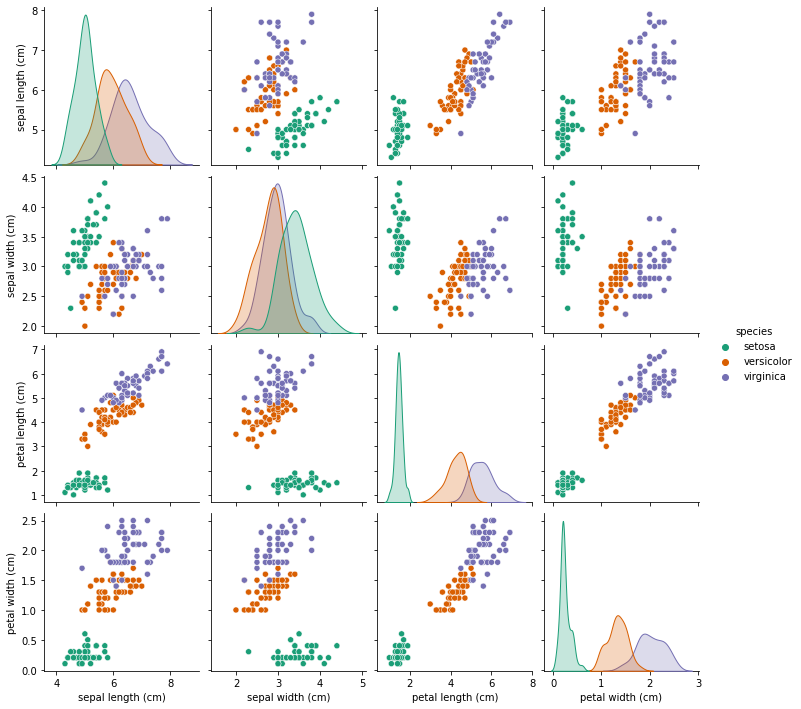

In [75]:
# Setosa is the most separable. 
sns.pairplot(iris,hue='species',palette='Dark2')

**Create a kde plot of sepal_length versus sepal width for setosa species of flower.**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

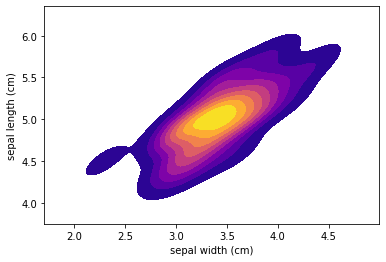

In [76]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal width (cm)'], setosa['sepal length (cm)'],
                 cmap="plasma", shade=True, shade_lowest=False)

# Train Test Split

** Split your data into a training set and a testing set.**

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train a Model

Now its time to train a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [79]:
from sklearn.svm import SVC

In [80]:
svc_model = SVC()

In [81]:
svc_model.fit(X_train,y_train)

SVC()

## Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [82]:
predictions = svc_model.predict(X_test)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(confusion_matrix(y_test,predictions))

[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]


In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.96        14
   virginica       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

